## Problem Statement:
<p>Given three text files in which two of them are having  sentiment class labels and upon making model, model must be able to predict data in 3rd text file which is unlabeld</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix
from prettytable import PrettyTable
import nltk
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


## Loading Data

<strong>Extracting data from first notepad</strong>

In [2]:
with open('1.txt','r') as f:
    data1 = f.readlines()

In [3]:
for i in data1:
    print(i)
    print('----'*10)


A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0

----------------------------------------
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0

----------------------------------------
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0

----------------------------------------
Very little music or anything to speak of.  	0

----------------------------------------
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1

----------------------------------------
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0

----------------------------------------
Wasted two hours.  	0

----------------------------------------
Saw the movie today and th


----------------------------------------
A film not easily forgotten.  	1

----------------------------------------
But, Kevin Spacey is an excellent, verbal tsunami as Buddy Ackerman  and totally believable because he is a great actor.  	1

----------------------------------------
The scripting of the subtle comedy is unmatched by any movie in recent years.  	1

----------------------------------------
The characters are interesting, even if a bit predictable.  	1

----------------------------------------
Highly recommended for all ages, although the younger set will probably not appreciate some of the more subtle references, they will certainly appreciate one galley scene in particular!  	1

----------------------------------------
Great movie!  	1

----------------------------------------
Also the story and acting were weak.  	0

----------------------------------------
At around 4 pm I bought it, at around 8pm I started to watch, at around 8.15pm I fast forwarded the remaining fi

<strong>Each line is having sentence and it class label at end of the  sentence, so, lets write a function to extract this sentence and class label</strong>

In [4]:
def extract_sent_label(raw_sent):
        
        sentence =  ' '.join([str(i) for i in raw_sent.split()])
        
        sent = sentence[:-1]
        label = sentence[-1]
        
        return sent,label

In [5]:
sentences = []
labels = []
for i in range(len(data1)):
    sent, label = extract_sent_label(data1[i])
    sentences.append(sent)
    labels.append(label)
    
data1 = pd.DataFrame()
data1['sentences'] = sentences
data1['label']     = labels


print('Shape of data1:',data1.shape)
data1.head()    

Shape of data1: (952, 2)


,sentences,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


<strong>Extracting data from second notepad</strong>

In [7]:
with open('2.txt','r') as f:
    data2 = f.readlines()

In [8]:
for i in data2:
    print(i)
    print('----'*10)


1	The Da Vinci Code book is just awesome.

----------------------------------------
1	this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.

----------------------------------------
1	i liked the Da Vinci Code a lot.

----------------------------------------
1	i liked the Da Vinci Code a lot.

----------------------------------------
1	I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.

----------------------------------------
1	that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code, which is amazing of course.

----------------------------------------
1	I loved the Da Vinci Code, but now I want something better and different!..

----------------------------------------
1	i thought da vinci code was great, same with kite runner.

----------------------------------------
1	The Da Vinci Code is actually a good movie...

-------------------------------------


----------------------------------------
1	I love The Da Vinci Code...

----------------------------------------
1	The Da Vinci Code is awesome..

----------------------------------------
1	The Da Vinci Code is awesome!!

----------------------------------------
1	Love luv lubb the Da Vinci Code!

----------------------------------------
1	the people who are worth it know how much i love the da vinci code.

----------------------------------------
1	I wanted desperately to love'The Da Vinci Code as a film.

----------------------------------------
1	The Da Vinci Code was awesome, I can't wait to read it...

----------------------------------------
1	The Da Vinci Code was absolutely AWESOME!

----------------------------------------
1	da vinci code was an awesome movie...

----------------------------------------
1	DA VINCI CODE IS AWESOME!!

----------------------------------------
1	I love The Da Vinci Code...

----------------------------------------
1	The Da Vinci Code is awesome..

----------------------------------------
1	we're gonna like watch Mission Impossible or Hoot.(

----------------------------------------
1	Which is why i said silent hill turned into reality coz i was hella like goin mission impossible down that bitch.

----------------------------------------
1	i love being a sentry for mission impossible and a station for bonkers.

----------------------------------------
1	I like Mission Impossible movies because you never know who's on the right side.

----------------------------------------
1	Mission Impossible 3 was excellent.

----------------------------------------
1	So as felicia's mom is cleaning the table, felicia grabs my keys and we dash out like freakin mission impossible.

----------------------------------------
1	I liked the first " Mission Impossible.

----------------------------------------
1	the last stand and Mission Impossible 3 both were awesome movies.

----------------------------------------
1	i love kirsten / leah / kate e

----------------------------------------
1	I, too, like Harry Potter..

----------------------------------------
1	I want to be here because I love Harry Potter, and I really want a place where people take it serious, but it is still so much fun.

----------------------------------------
1	I love the Harry Potter series if you can count that as " a " book, also Catcher In the Tye, Jane Eyre, The Virgin Suicides, yeah...

----------------------------------------
1	Because I would like to make friends who like the same things I like, and I really like Harry Potter, so I thought that joining a community like this would be a good start.

----------------------------------------
1	the story of Harry Potter is a deep and profound one, and I love Harry Potter.

----------------------------------------
1	Harry Potter is AWESOME I don't care if anyone says differently!..

----------------------------------------
1	I love Harry Potter..

----------------------------------------
1	I love Harry Po

----------------------------------------
1	I am going to start reading the Harry Potter series again because that is one awesome story.

----------------------------------------
1	I, too, like Harry Potter..

----------------------------------------
1	I want to be here because I love Harry Potter, and I really want a place where people take it serious, but it is still so much fun.

----------------------------------------
1	I love the Harry Potter series if you can count that as " a " book, also Catcher In the Tye, Jane Eyre, The Virgin Suicides, yeah...

----------------------------------------
1	Because I would like to make friends who like the same things I like, and I really like Harry Potter, so I thought that joining a community like this would be a good start.

----------------------------------------
1	the story of Harry Potter is a deep and profound one, and I love Harry Potter.

----------------------------------------
1	Harry Potter is AWESOME I don't care if anyone says dif

----------------------------------------
1	I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:

----------------------------------------
1	Anyway, thats why I love " Brokeback Mountain.

----------------------------------------
1	Brokeback mountain was beautiful...

----------------------------------------
1	I love Brokeback Mountain.

----------------------------------------
1	I love Brokeback Mountain....

----------------------------------------
1	He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..

----------------------------------------
1	Brokeback Mountain was so awesome.

----------------------------------------
1	Brokeback Mountain was an AWESOME movie.

----------------------------------------
1	man i loved brokeback mountain!

----------------------------------------
1	dudeee i LOVED brokeback mountain!!!!

----------------------------------------
1	I either LOVE Brokeback Mountain or think it's great that homosexual

----------------------------------------
0	Da Vinci Code sucks be...

----------------------------------------
0	Da Vinci Code sucked..

----------------------------------------
0	The Da Vinci Code sucked big time.

----------------------------------------
0	Da Vinci Code = Up, Up, Down, Down, Left, Right, Left, Right, B, A, SUCK!

----------------------------------------
0	by the way, the Da Vinci Code sucked, just letting you know...

----------------------------------------
0	i heard da vinci code sucked soo much only 2.5 stars:

----------------------------------------
0	da vinci code sucks...

----------------------------------------
0	Da Vinci Code sucks.

----------------------------------------
0	friday hung out with kelsie and we went and saw The Da Vinci Code SUCKED!!!!!

----------------------------------------
0	Combining the opinion / review from Gary and Gin Zen, The Da Vinci Code sucks.

----------------------------------------
0	Da Vinci Code sucks be...

--------------

----------------------------------------
0	I think I hate Harry Potter because it outshines much better reading material out there and the movies are just plain stupid to begin with.

----------------------------------------
0	I hate Harry Potter.

----------------------------------------
0	Not because I hate Harry Potter, but because I am the type of person that likes it when the main character dies.

----------------------------------------
0	Harry Potter dragged Draco Malfoy ’ s trousers down past his hips and sucked him into his throat with vigor, making whimpering noises and panting and groaning around the blonds rock-hard, aching cock...

----------------------------------------
0	These Harry Potter movies really suck.

----------------------------------------
0	I hate Harry Potter, that daniel wotshisface needs a fucking slap...

----------------------------------------
0	This quiz sucks and Harry Potter sucks ok bye..

----------------------------------------
0	I hate Harry Pot


----------------------------------------
0	I hate Harry Potter, that daniel wotshisface needs a fucking slap...

----------------------------------------
0	This quiz sucks and Harry Potter sucks ok bye..

----------------------------------------
0	I hate Harry Potter, it's retarted, gay and stupid and there's only one Black guy...

----------------------------------------
0	Is it just me, or does Harry Potter suck?...

----------------------------------------
0	Always knows what I want, not guy crazy, hates Harry Potter..

----------------------------------------
0	I think I hate Harry Potter because it outshines much better reading material out there and the movies are just plain stupid to begin with.

----------------------------------------
0	I hate Harry Potter.

----------------------------------------
0	Not because I hate Harry Potter, but because I am the type of person that likes it when the main character dies.

----------------------------------------
0	Harry Potter dragged 

----------------------------------------
0	Oh, and Brokeback Mountain was a terrible movie.

----------------------------------------
0	Brokeback Mountain is fucking horrible..

----------------------------------------
0	Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..

----------------------------------------
0	, she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..

----------------------------------------
0	My dad's being stupid about brokeback mountain...

----------------------------------------
0	Oh, and Brokeback Mountain is a TERRIBLE movie...

----------------------------------------
0	Brokeback Mountain was boring.

----------------------------------------
0	So Brokeback Mountain was really depressing.

----------------------------------------
0	As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.

--------------

<strong>Each line is having sentence and it class label at beginning of the sentence, so, lets write

In [9]:
def extract_sent_label(raw_sent):
        
        sentence =  ' '.join([str(i) for i in raw_sent.split()])
        
        sent = sentence[1:]
        label = sentence[0]
        
        return sent,label

In [10]:
sentences = []
labels = []
for i in range(len(data2)):
    sent, label = extract_sent_label(data2[i])
    sentences.append(sent)
    labels.append(label)
    
data2 = pd.DataFrame()
data2['sentences'] = sentences
data2['label']     = labels


print('Shape of data2:',data2.shape)
data2.head()    

Shape of data2: (7086, 2)


,sentences,label
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever re...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly di...,1


<strong>Joining two dataframs</strong>

In [11]:
data = data1.append(data2)
print('Shape of joined data:',data.shape)
data.head()

Shape of joined data: (8038, 2)


,sentences,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
# Saving joined dataframe
data.to_csv('data.csv',index=False)

In [14]:
data = pd.read_csv('data.csv')
print('Shape of the data:',data.shape)
data.head()

Shape of the data: (8038, 2)


,sentences,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8038 entries, 0 to 8037
Data columns (total 2 columns):
sentances    8038 non-null object
label        8038 non-null int64
dtypes: int64(1), object(1)
memory usage: 125.7+ KB


### Observations:
<ol>
    <li>Total number of rows in dataframe  is 7618</li>
    <li>There are no empty or nan cells in the dataframe</li>
    
</ol>    

## Exploratory Data Analysis

<ol>
    <li>Check is data balanced</li>
    
</ol>    

### Checking data is balanced 

In [0]:
data.label.value_counts()

1    4479
0    3559
Name: label, dtype: int64

<strong>Since this simple two class classification normal machine learning techniques are sufficient</strong>

Number of points belong to class 1  4479 , ( 55.72281662105001 %)
Number of points belong to class 0  3559 , ( 44.277183378949985 %)


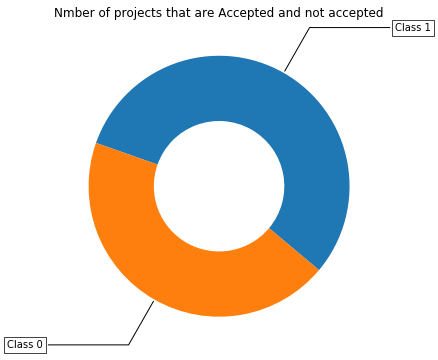

In [0]:
# CODE CITATIONS
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


label_counts = data['label'].value_counts()
print("Number of points belong to class 1 ", label_counts[1], ", (", (label_counts[1]/(label_counts[1]+label_counts[0]))*100,"%)")
print("Number of points belong to class 0 ", label_counts[0], ", (", (label_counts[0]/(label_counts[1]+label_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Class 1", "Class 0"]

plt_data = [label_counts[1], label_counts[0]]

wedges, texts = ax.pie(plt_data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### Observations:
<ol>
    <li>There are 4479 class 1 data points and 3559 class 0 data points, i.e almost class 1 is  having 1000 data points high</li>
    <li>As class 0 is having less datapoints but not considerablly less data points we can say that the data is imbalanced</li>
    
</ol>    

### EDA On Length Of sentences:

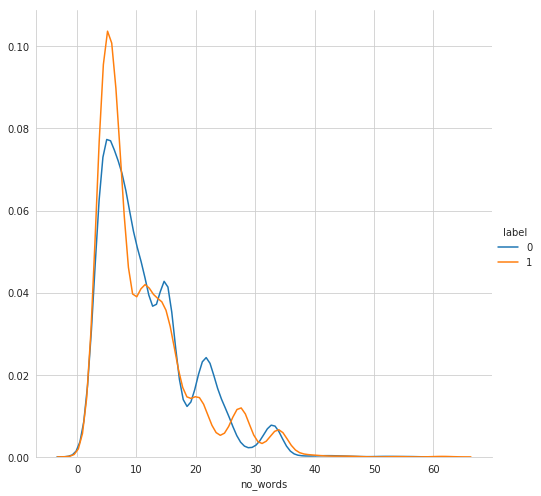

In [0]:
data['no_words'] = data.sentences.apply(lambda x:len(x.split()))
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='label',height=7,).map(sns.distplot,'no_words',hist=False).add_legend()
plt.show()

<h1> Is length of sentences effecting the class label?--->
Yes but very little</h1>

### EDA On Presence Of Numbers In sentences

In [0]:
number_presence = [0  for i in range(data.shape[0])]
for i in range(data.shape[0]):
     for j in data.sentences.iloc[i].split():
            if j.isdigit():
                number_presence[i] += 1
            

In [0]:
data['number_presence'] = number_presence
data.number_presence.value_counts()

0    7640
1     386
2      11
3       1
Name: number_presence, dtype: int64

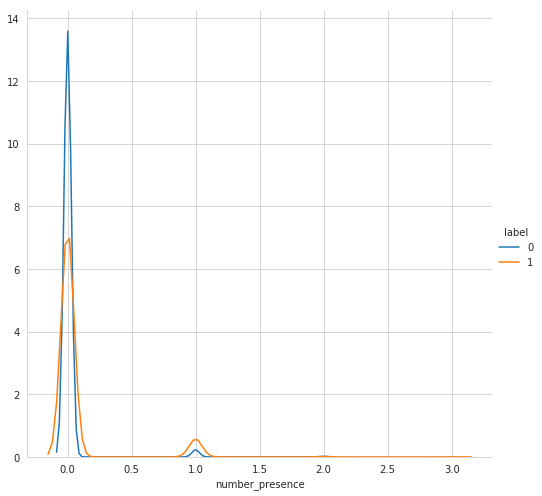

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='label',size=7).map(sns.distplot,'number_presence',hist=False).add_legend()
plt.show()

In [0]:
print('Zero number of numbers in sentence ')
print(data[data.number_presence == 0 ].label.value_counts())
print('-'*50)
print('One number of numbers in sentence ')
print(data[data.number_presence == 1 ].label.value_counts())
print('-'*50)
print('Two number of numbers in sentence ')
print(data[data.number_presence == 2 ].label.value_counts())
print('-'*50)
print('Three number of numbers in sentence ')
print(data[data.number_presence == 3 ].label.value_counts())


Zero number of numbers in sentance 
1    4145
0    3495
Name: label, dtype: int64
--------------------------------------------------
One number of numbers in sentance 
1    327
0     59
Name: label, dtype: int64
--------------------------------------------------
Two number of numbers in sentance 
1    6
0    5
Name: label, dtype: int64
--------------------------------------------------
Three number of numbers in sentance 
1    1
Name: label, dtype: int64


<h1> Is presence of number effecting the class label? --> Yes but, only if one number is present in the sentence then it  is effecting</h1> 

### EDA On Presence Of Exclamation Mark And Question Mark

In [0]:
exc_presence = [0  for i in range(data.shape[0])]
quest_presence = [0  for i in range(data.shape[0])]

for i in range(data.shape[0]):
     for j in data.sentences.iloc[i]:
            if j == '!':
                exc_presence[i] += 1
            elif j == '?':
                quest_presence[i]+=1
data['exc_presence']   = exc_presence
data['quest_presence'] = quest_presence

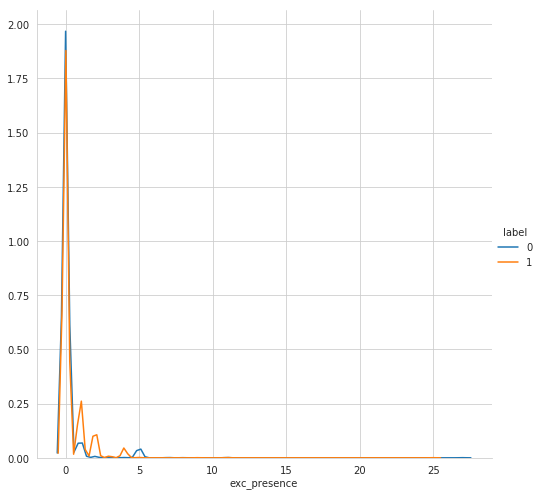

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='label',size=7).map(sns.distplot,'exc_presence',hist=False).add_legend()
plt.show()

In [0]:
data.exc_presence.value_counts()

0     6868
1      692
2      274
4       89
5       85
3       20
11       4
7        2
27       1
25       1
9        1
8        1
Name: exc_presence, dtype: int64

In [0]:
print('Zero number of exclamation marks in sentence ')
print(data[data.exc_presence == 0 ].label.value_counts())
print('-'*50)

print('One number of exclamation marks in sentence ')
print(data[data.exc_presence == 1 ].label.value_counts())
print('-'*50)

print('Two number of exclamation marks in sentence ')
print(data[data.exc_presence == 2 ].label.value_counts())
print('-'*50)

print('Three number of exclamation marks in sentence ')
print(data[data.exc_presence == 3 ].label.value_counts())
print('-'*50)

print('Four number of exclamation marks in sentence ')
print(data[data.exc_presence == 4 ].label.value_counts())
print('-'*50)

print('Five number of exclamation marks in sentence ')
print(data[data.exc_presence == 5 ].label.value_counts())
print('-'*50)

Zero number of exclamation marks in sentance 
1    3565
0    3303
Name: label, dtype: int64
--------------------------------------------------
One number of exclamation marks in sentance 
1    541
0    151
Name: label, dtype: int64
--------------------------------------------------
Two number of exclamation marks in sentance 
1    263
0     11
Name: label, dtype: int64
--------------------------------------------------
Three number of exclamation marks in sentance 
1    16
0     4
Name: label, dtype: int64
--------------------------------------------------
Four number of exclamation marks in sentance 
1    87
0     2
Name: label, dtype: int64
--------------------------------------------------
Five number of exclamation marks in sentance 
0    82
1     3
Name: label, dtype: int64
--------------------------------------------------


<h1>Is presence of exclamation mark effecting the class label? --> Yes </h1>

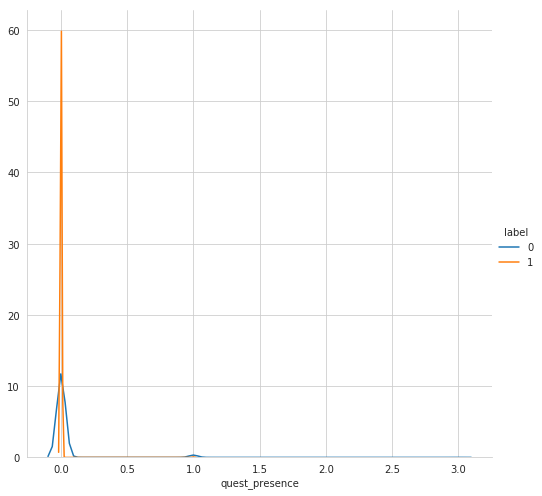

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='label',size=7).map(sns.distplot,'quest_presence',hist=False).add_legend()
plt.show()

In [0]:
data.quest_presence.value_counts()

0    7936
1     101
3       1
Name: quest_presence, dtype: int64

In [0]:
print('Zero number of question marks in sentence ')
print(data[data.quest_presence == 0 ].label.value_counts())
print('-'*50)
print('One number of question marks in sentence ')
print(data[data.quest_presence == 1 ].label.value_counts())
print('-'*50)
print('Three number of question marks in sentence ')
print(data[data.quest_presence == 3 ].label.value_counts())


Zero number of question marks in sentance 
1    4474
0    3462
Name: label, dtype: int64
--------------------------------------------------
One number of question marks in sentance 
0    96
1     5
Name: label, dtype: int64
--------------------------------------------------
Three number of question marks in sentance 
0    1
Name: label, dtype: int64


<h1>Is presence of question mark effecting the class label? --> Yes but, only if one question mark is present </h1>

### EDA On Mean Word Lengths

In [0]:
data['mean_word_length'] = data.sentences.apply(lambda x:int(np.mean([len(i)  for i in x.split()])))

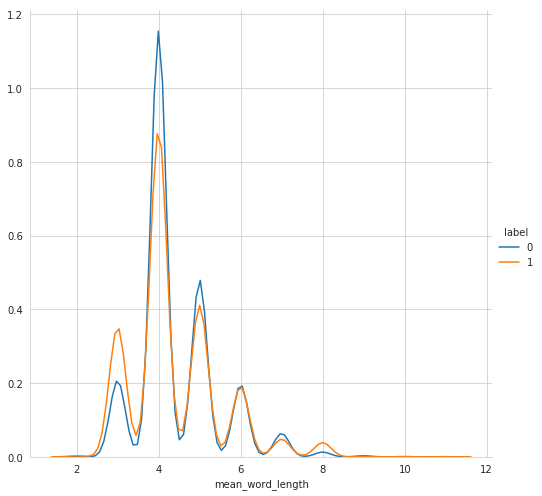

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='label',size=7).map(sns.distplot,'mean_word_length',hist=False).add_legend()
plt.show()

In [0]:
data.mean_word_length.value_counts()

4     3995
5     1758
3     1165
6      770
7      218
8      112
2        8
9        7
10       3
11       2
Name: mean_word_length, dtype: int64

In [0]:
print('2 number of question marks in sentence ')
print(data[data.mean_word_length == 2 ].label.value_counts())
print('-'*50)
print('Three number of question marks in sentence ')
print(data[data.mean_word_length == 3 ].label.value_counts())
print('-'*50)
print('Four number of question marks in sentence ')
print(data[data.mean_word_length == 4 ].label.value_counts())
print('-'*50)

print('Five number of question marks in sentence ')
print(data[data.mean_word_length == 5 ].label.value_counts())
print('-'*50)

print('Six number of question marks in sentence ')
print(data[data.mean_word_length == 6 ].label.value_counts())
print('-'*50)

print('Seven number of question marks in sentence ')
print(data[data.mean_word_length == 7 ].label.value_counts())
print('-'*50)


2 number of question marks in sentance 
1    7
0    1
Name: label, dtype: int64
--------------------------------------------------
Three number of question marks in sentance 
1    816
0    349
Name: label, dtype: int64
--------------------------------------------------
Four number of question marks in sentance 
1    2057
0    1938
Name: label, dtype: int64
--------------------------------------------------
Five number of question marks in sentance 
1    952
0    806
Name: label, dtype: int64
--------------------------------------------------
Six number of question marks in sentance 
1    441
0    329
Name: label, dtype: int64
--------------------------------------------------
Seven number of question marks in sentance 
1    111
0    107
Name: label, dtype: int64
--------------------------------------------------


<h1> Is mean word length effecting the class label--> Yes</h1>

## Cleaning Data

In [0]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

In [0]:
def  clean(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence=re.sub(r'\\r',' ',sentence)
    sentence=re.sub(r'\\n',' ',sentence)
    sentence=re.sub(r'\\b',' ',sentence)
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence=re.sub(r'nannan','',sentence)
    
    sent=[]
    for word in sentence.split():
        if (word not in stop_words) and (word.isalpha()):
            sent.append(word)
    sentence=' '.join(sent)
    return sentence

In [0]:
data['clean_sent'] = data.sentences.apply(lambda x:clean(x))

In [0]:
data = pd.read_csv('gdrive/My Drive/digital/data.csv')

## Splitting Data

In [0]:
y=data.label
x=data.drop(['label'],axis=1)

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [14]:
print('Train :',xtrain.shape)
print('Test :',xtest.shape)

Train : (6430, 7)
Test : (1608, 7)


## Featurizing Data

<strong> Since this text data we shall go with some nlp techniques like Bag of words, Tfidf any how some  simple features like mean word length, question mark  presence..etc which are optained with EDA may help us to predict the class label</strong>

### Applying Bag Of Words On sentences

In [0]:
bow_sent_vector=CountVectorizer()
bow_sent_vector.fit(xtrain.sentences)

sent_train_bow=bow_sent_vector.transform(xtrain.sentences)
sent_test_bow=bow_sent_vector.transform(xtest.sentences)


In [112]:
print('Shape of the bow')
print('Train -',sent_train_bow.shape)
print('Test -',sent_test_bow.shape)


Shape of the bow
Train - (6430, 3588)
Test - (1608, 3588)


### Applying TFIDF On sentences

In [113]:
tfidf_sent_vector=TfidfVectorizer()
tfidf_sent_vector.fit(xtrain.sentences)

sent_train_tfidf=tfidf_sent_vector.transform(xtrain.sentences)
sent_test_tfidf=tfidf_sent_vector.transform(xtest.sentences)


print('Shape of tfidf data')
print('Train',sent_train_tfidf.shape)
print('Test',sent_test_tfidf.shape)


Shape of tfidf data
Train (6430, 3588)
Test (1608, 3588)


## Normalizing Numerical Data

### Number of words 

In [114]:
normal_nw=Normalizer()

normal_nw.fit(data.no_words.values.reshape(-1,1))
no_words_train_normal=normal_nw.transform(xtrain.no_words.values.reshape(-1,1))
no_words_test_normal=normal_nw.transform(xtest.no_words.values.reshape(-1,1))

print('Shape of the number of words after normalizing')
print('Train',no_words_train_normal.shape)
print('Test',no_words_test_normal.shape)


Shape of the number of words after normalizing
Train (6430, 1)
Test (1608, 1)


### Number Presence

In [115]:
normal_np=Normalizer()
normal_np.fit(data.number_presence.values.reshape(-1,1))
no_presence_train_normal=normal_np.transform(xtrain.number_presence.values.reshape(-1,1))
no_presence_test_normal=normal_np.transform(xtest.number_presence.values.reshape(-1,1))

print('Shape of the number presence after normalizing')
print('Train',no_presence_train_normal.shape)
print('Test',no_presence_test_normal.shape)


Shape of the number presence after normalizing
Train (6430, 1)
Test (1608, 1)


### Exclamation Mark

In [116]:
normal_em=Normalizer()
normal_em.fit(data.number_presence.values.reshape(-1,1))
exc_presence_train_normal=normal_em.transform(xtrain.exc_presence.values.reshape(-1,1))
exc_presence_test_normal=normal_em.transform(xtest.exc_presence.values.reshape(-1,1))

print('Shape of the exclamation mark presence after normalizing')
print('Train',exc_presence_train_normal.shape)
print('Test',exc_presence_test_normal.shape)


Shape of the exclamation mark presence after normalizing
Train (6430, 1)
Test (1608, 1)


### Question Mark

In [117]:
normal_qm=Normalizer()
normal_qm.fit(data.number_presence.values.reshape(-1,1))
qst_presence_train_normal=normal_qm.transform(xtrain.quest_presence.values.reshape(-1,1))
qst_presence_test_normal=normal_qm.transform(xtest.quest_presence.values.reshape(-1,1))

print('Shape of the exclamation mark presence after normalizing')
print('Train',qst_presence_train_normal.shape)
print('Test',qst_presence_test_normal.shape)


Shape of the exclamation mark presence after normalizing
Train (6430, 1)
Test (1608, 1)


### Mean Word Length

In [118]:
normal_mwl=Normalizer()
normal_mwl.fit(data.number_presence.values.reshape(-1,1))
mwl_train_normal=normal_mwl.transform(xtrain.mean_word_length.values.reshape(-1,1))
mwl_test_normal=normal_mwl.transform(xtest.mean_word_length.values.reshape(-1,1))

print('Shape of the exclamation mark presence after normalizing')
print('Train',mwl_train_normal.shape)
print('Test', mwl_test_normal.shape)


Shape of the exclamation mark presence after normalizing
Train (6430, 1)
Test (1608, 1)


In [29]:
data.head()

,sentances,label,no_words,number_presence,exc_presence,quest_presence,mean_word_length,clean_sent
0,"A very, very, very slow-moving, aimless movie ...",0,13,0,0,0,5,slow moving aimless movie distressed drifting ...
1,Not sure who was more lost - the flat characte...,0,19,0,0,0,4,sure lost flat characters audience nearly half...
2,Attempting artiness with black & white and cle...,0,31,0,0,0,5,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,8,0,0,0,4,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,21,0,0,0,4,best scene movie gerardo trying find song keep...


## Joining All Features

In [0]:
xtr=hstack((sent_train_bow,sent_train_tfidf,no_words_train_normal,no_presence_train_normal,exc_presence_train_normal,qst_presence_train_normal,mwl_train_normal)).tocsr()
xte=hstack((sent_test_bow,sent_test_tfidf,no_words_test_normal,no_presence_test_normal,exc_presence_test_normal,qst_presence_test_normal,mwl_test_normal)).tocsr()

In [49]:
print('Shape of final train ',xtr.shape)
print('Shape of final test ',xte.shape)


Shape of final train  (6430, 7181)
Shape of final test  (1608, 7181)


## Applying Machine Learninig Models

<strong>Because this is almost balanced dataset with less data  logistic regression seems to work better and metrics like  AUC score and accuracy are preffered.</strong>

### Logistic Regression

In [0]:
def cm_heatmap(cm):
    
    '''This is the function that plots the confusion matrix using heat maps if confusion matrix is passed to the function'''
    
    cm=pd.DataFrame(cm,index=['0','1'],columns=['0','1'])
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [0]:
def table(c_mat,s):
        
        '''This is the function that returns the table of confusion matrix along with Accuracy and
        Percentage of Miss Classified Points'''

        x=PrettyTable()
        x.field_names=[' ','Predicted No','Predicted Yes','Total']

        x.add_row(['Actual No','TN : '+str(c_mat[0][0]),'FP : '+str(c_mat[0][1]),\
                   'N :'+str(np.sum(c_mat,axis=1)[0])])
        x.add_row([' ',' ',' ',' '])
        x.add_row(['Actual Yes','FN : '+str(c_mat[1][0]),'TP : '+str(c_mat[1][1]),\
                   'P :'+str(np.sum(c_mat,axis=1)[1])])
        
        x.add_row([' ',' ',' ',' '])
        
        print(x)
        print('='*50)
        
        print('Accuracy:',np.trace(c_mat)/s)
        print('Percentage of Miss Classified points:',(c_mat[0][1]+c_mat[1][0])/s)
        print('='*50)
        
        
                
        
        return x

In [0]:
def aucf(train,test,besta,ytrain):
        '''This function plots AUC plot by calculating TPR and FPR values and returns the log plrobabilities'''
       
    
    
        
        model=LogisticRegression(C=besta,class_weight = 'balanced',penalty = 'l2')
        model.fit(train,ytrain)
        
        
        
        
       # ytrain_pred=score_pred(neigh,train)
       # ytest_pred=score_pred(neigh,test)
        
        
        
        
        ytrain_pred=model.predict_proba(train)[:,1]
        ytest_pred=model.predict_proba(test)[:,1]
        
        
        
        train_fpr,train_tpr,train_threshold=roc_curve(ytrain,ytrain_pred)
        
        test_fpr,test_tpr,test_threshold=roc_curve(ytest,ytest_pred)
        
        
        plt.figure(figsize=(15,10))
        
        plt.plot(train_fpr,train_tpr,label='Train AUC :'+ (str(auc(train_fpr , train_tpr))))

        plt.plot(test_fpr,test_tpr,label='Test AUC:'+str(auc(test_fpr, test_tpr)))

        plt.xlabel('Hyperparameters',size=10)
        plt.ylabel('AUC',size=10)
        plt.title('Reciever Operating Characterstic Curve')
        plt.legend(prop={'size':20})
        plt.grid()
        plt.show()
        
        
        
        #Making Confusion Matrix 
        
        print('Confusion Matrix for train data:')
        
        cm_tr=confusion_matrix( ytrain, predect(ytrain_pred,train_threshold,train_fpr,train_tpr))
                
        table(cm_tr,s=train.shape[0])
        
        print('Heat Map for train data')
        
        cm_heatmap(cm_tr)

        print('Confusion Matrix for test data:')
        cm_te=confusion_matrix(ytest,  predect(ytest_pred,test_threshold,test_fpr,test_tpr))
        
        table(cm_te,s=test.shape[0])
        
        print('Heat Map for test data')
        
        cm_heatmap(cm_te)
       
        return 

In [0]:
def score_pred(nei,dat):
    '''This function will return the score of given data for class 1 i.e class 1'''
    ypred=[]
    n_train=dat.shape[0] - dat.shape[0]%1000
    for i in range(0,n_train,1000):
        ypred.extend(nei.predict_proba(dat[i:i+1000])[:,1])
    ypred.extend(nei.predict_proba(dat[n_train:])[:,1])
    
    return ypred

In [0]:
def predect(d,threshold,fpr,tpr):
    
    '''This function changes the predection boundary from 0.5 to the max value for higher TPR and
    lower FPR'''
    
    #We need FPR value to decrease as TPR value increase
    temp=threshold[np.argmax(tpr*(1-fpr))]
    pridect=[]
    for val in d:
        if val>temp:
            pridect.append(1)
        else:
            pridect.append(0)
    return pridect

In [0]:
def lregression(train,cv,ytrain):
        
        '''This function plots error plot '''
        
        train_auc=[]
        cv_auc=[]
        
        c=[0.00001,0.00012,0.00015,0.0003,0.0004,0.0005,0.005,0.01,1,2,3,4,5,6,7,10,100]
        log_c=list(math.log(i) for i in c)
        #c=list(np.arange(0.001,1,0.05))

        print('\nPreparing plot for best C Please Wait...')
        
        '''This for loop itterates through the c values and appends auc score for train and cv data'''
        for i in c:
              
                model=LogisticRegression(C=i,class_weight = 'balanced',penalty = 'l2',fit_intercept=False)
                model.fit(train,ytrain)

            
                y_train_pred=model.predict_proba(train)[:,1]#gets only for probabilities of label 1
                y_cv_pred=model.predict_proba(cv)[:,1]

                y_train_auc_score=roc_auc_score(ytrain,y_train_pred)
                y_cv_auc_score=roc_auc_score(ytest,y_cv_pred)


                print("C: {:20} Train: {:20} cv: {}".format(i,y_train_auc_score,y_cv_auc_score))
                
               
                
                train_auc.append(y_train_auc_score)
                
                cv_auc.append(y_cv_auc_score)
                

        
        
        plt.figure(figsize=(15,10))
        
        #Marker concept is taken from this website https://matplotlib.org/api/markers_api.html
        plt.plot(log_c, train_auc, label='Train AUC',marker=8)
        plt.plot(log_c, cv_auc, label='CV AUC',marker=9)

        #plt.scatter(k, train_auc, label='Train AUC points')
        #plt.scatter(k, cv_auc, label='CV AUC points')

        plt.legend(prop={'size':20})
        plt.xlabel("C: hyperparameter",size=20)
        plt.ylabel("AUC",size=20)
        plt.title("ERROR PLOTS")
        #plt.grid(axis='x')
        plt.show()
        return model


Preparing plot for best C Please Wait...
C:                1e-05 Train:   0.9673847181216456 cv: 0.9564544040930979
C:              0.00012 Train:   0.9688159782746472 cv: 0.9583510985152487
C:              0.00015 Train:   0.9691160527491909 cv: 0.9587084921749598
C:               0.0003 Train:   0.9709845334694794 cv: 0.9611208993780096
C:               0.0004 Train:   0.9721949286139393 cv: 0.9627040905898876
C:               0.0005 Train:   0.9731642642572872 cv: 0.9636022772873194
C:                0.005 Train:   0.9867502561808628 cv: 0.9799906576043338
C:                 0.01 Train:   0.9903327199501296 cv: 0.9839611757624398
C:                    1 Train:   0.9999451023502959 cv: 0.9950811346308187
C:                    2 Train:   0.9999738255848732 cv: 0.9953335047150882
C:                    3 Train:    0.999985099209366 cv: 0.9953915028089888
C:                    4 Train:   0.9999920594470963 cv: 0.9953570174558588
C:                    5 Train:   0.9999967649599282 cv: 0.

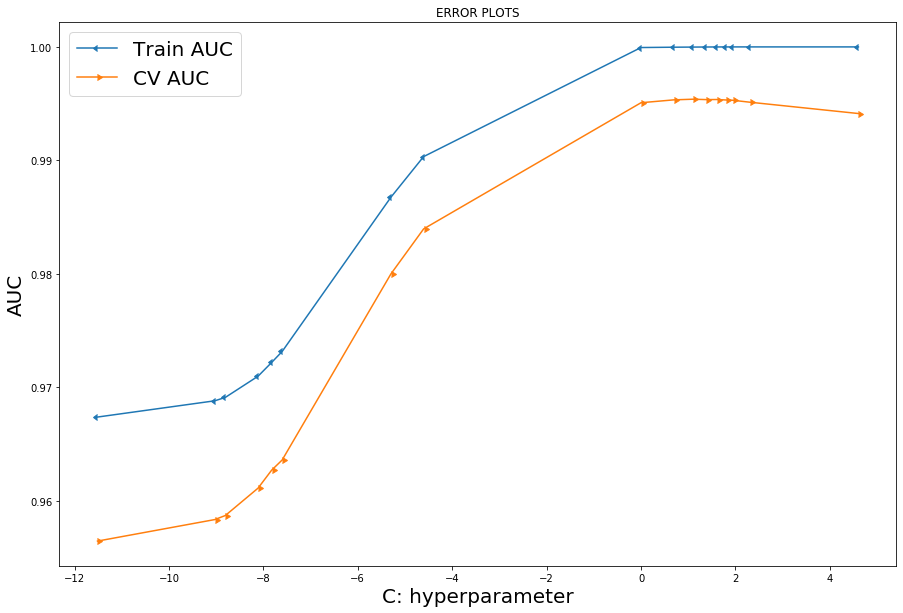

In [103]:
lr_model = lregression(train=xtr,cv=xte,ytrain=ytrain)

### Observations:
<ol>
    <li>The auc score is  gradually increasing with increase in c(hyperparameter) value.</li>
    <li>The auc score after 3 started decreasing </li>
    <li>So the best hyperparameter  is 3</li>

</ol>    

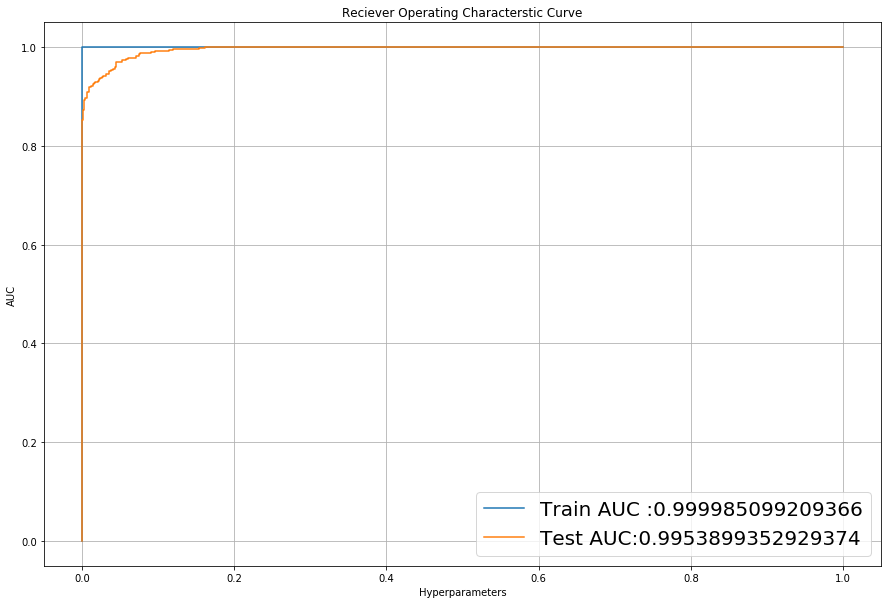

Confusion Matrix for train data:
+------------+--------------+---------------+---------+
|            | Predicted No | Predicted Yes |  Total  |
+------------+--------------+---------------+---------+
| Actual No  |  TN : 2847   |     FP : 0    | N :2847 |
|            |              |               |         |
| Actual Yes |    FN : 2    |   TP : 3581   | P :3583 |
|            |              |               |         |
+------------+--------------+---------------+---------+
Accuracy: 0.9996889580093312
Percentage of Miss Classified points: 0.00031104199066874026
Heat Map for train data


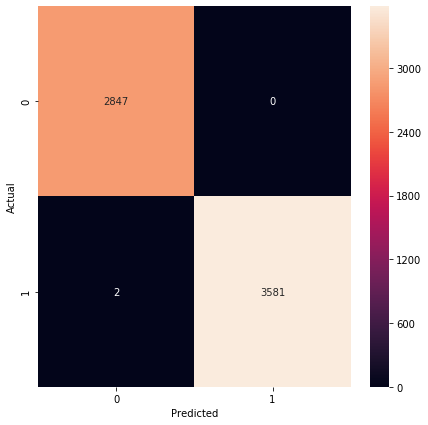

Confusion Matrix for test data:
+------------+--------------+---------------+--------+
|            | Predicted No | Predicted Yes | Total  |
+------------+--------------+---------------+--------+
| Actual No  |   TN : 680   |    FP : 32    | N :712 |
|            |              |               |        |
| Actual Yes |   FN : 29    |    TP : 867   | P :896 |
|            |              |               |        |
+------------+--------------+---------------+--------+
Accuracy: 0.9620646766169154
Percentage of Miss Classified points: 0.03793532338308458
Heat Map for test data


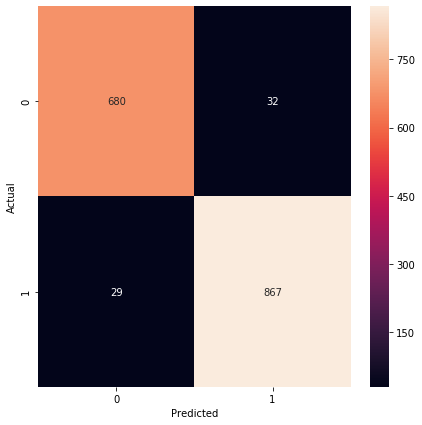

In [81]:
aucf(train=xtr,test=xte,besta=3,ytrain=ytrain)

### Observations:
<ol>
    <li>From the confusion matrix for test data we can say that the miss classification of points are very less</li>
    <li>The accuracy of the model on test data is also 96% by which we can say that the performance of model is very good</li>
</ol>    

<h1>As the perforance of the model  is  very good we shall try to predict the class labels  for unlabeld data</h1>

In [0]:
with open('gdrive/My Drive/digital/3.txt','r') as f:
    unlabel = f.readlines()

In [84]:
unlabel[:5]

[',index,Text,Prediction\n',
 "0,0,I exchanged the sony ericson z500a for this and I'm pretty happy with that decision.,\n",
 '1,1,Oh and I forgot to also mention the weird color effect it has on your phone.,\n',
 '2,2,"Verizon tech support walked my through a few procedures, none of which worked and I ended up having to do a hard re-set, wiping out all my data.",\n',
 "3,3,Better than you'd expect.,\n"]

In [0]:
def test_your_data(sent,only_pred = True):

        
        no_words = len(sent.split())
        number_presence = 0
        exc_presence    = 0
        quest_presence  = 0
        mean_word_len   = 0
        for i in sent.split():
            if i.isdigit():
                number_presence += 1
        for i in sent:
            if i == '!':
                exc_presence += 1
            elif i == '?':
                quest_presence += 1
        word_lens  = []
        for i in sent.split():
            word_lens.append(len(i))
        mean_word_len  = np.mean(word_lens)
        
        cl_sent = clean(sent)
        mwl = normal_mwl.transform(np.array(mean_word_len).reshape(-1,1))
        qm  = normal_qm.transform(np.array(quest_presence).reshape(-1,1))
        em  = normal_em.transform(np.array(exc_presence).reshape(-1,1))
        np_  = normal_np.transform(np.array(number_presence).reshape(-1,1))
        nw  = normal_nw.transform(np.array(no_words).reshape(-1,1))
        tfidf_= tfidf_sent_vector.transform([cl_sent])
        bow_  = bow_sent_vector.transform([cl_sent])
        final_vect = hstack((bow_,tfidf_,nw,np_,em,qm,mwl)).tocsr()
        pred = lr_model.predict(final_vect)
        if only_pred:
            print(sent)
            return 'It belong to class {}'.format(pred.tolist()[0])
        else:
            return [sent,no_words,number_presence,exc_presence,quest_presence,mean_word_len,cl_sent,pred.tolist()[0]]

        
# sent_train_bow,sent_train_tfidf,no_words_train_normal,no_presence_train_normal,exc_presence_train_normal,qst_presence_train_normal,mwl_train_normal)).tocsr()


In [181]:
unlabel_dataframe = []
for  i in range(len(unlabel)):

    unlabel_dataframe.append(test_your_data(unlabel[i],only_pred=False))
unlabel_dataframe = pd.DataFrame(unlabel_dataframe)
unlabel_dataframe.columns = columns = ['sentences', 'no_words', 'number_presence', 'exc_presence', 'quest_presence', 'mean_word_length', 'clean_sent','label']

unlabel_dataframe

,sentences,no_words,number_presence,exc_presence,quest_presence,mean_word_length,clean_sent,label
0,",index,Text,Prediction\n",1,0,0,0,22.000000,index text prediction,0
1,"0,0,I exchanged the sony ericson z500a for thi...",15,0,0,0,5.000000,exchanged sony ericson pretty happy decision,1
2,"1,1,Oh and I forgot to also mention the weird ...",16,0,0,0,4.125000,oh forgot also mention weird color effect phone,0
3,"2,2,""Verizon tech support walked my through a ...",28,0,0,0,4.428571,verizon tech support walked procedures none wo...,0
4,"3,3,Better than you'd expect.,\n",4,0,0,0,6.750000,better would expect,0
...,...,...,...,...,...,...,...,...
928,"927,927,I got it because it was so small and a...",10,0,0,0,4.600000,got small adorable,1
929,"928,928,Avoid this one if you can.,\n",6,0,0,0,5.000000,avoid one,0
930,"929,929,Reversible plug works great.,\n",4,0,0,0,8.500000,reversible plug works great,1
931,"930,930,""you can even take self portraits with...",13,0,0,0,6.076923,even take self portraits outside exterior disp...,0


In [0]:
unlabel_dataframe[['sentences','label']].to_csv('gdrive/My Drive/digital/unlabel_pred.csv',index=False)

In [0]:
from google.colab import files
files.download('gdrive/My Drive/digital/unlabel_pred.csv')

<strong>We shall see some prediction os unlabeled data</strong>

In [183]:
import random
for i in range(10):
    r = random.randint(5,100)
    print(test_your_data(unlabel[r]))
    print('---'*5)

94,94,Terrible phone holder.,

It belong to class 0
---------------
61,61,"I have had this phone for over a year now, and I will tell you, its not that great.",

It belong to class 1
---------------
78,78,disappointing.,

It belong to class 0
---------------
41,41,This phone tries very hard to do everything but fails at it's very ability to be a phone.,

It belong to class 0
---------------
37,37,I love the look and feel of Samsung flipphones.,

It belong to class 1
---------------
60,60,It didn't charge for me.,

It belong to class 0
---------------
78,78,disappointing.,

It belong to class 0
---------------
79,79,I own 2 of these cases and would order another.,

It belong to class 0
---------------
46,46,It defeats the purpose of a bluetooth headset.,

It belong to class 0
---------------
74,74,I'm a bit disappointed.,

It belong to class 0
---------------


<strong>Since this model is working properly and miss classification percentage is also very less and keeping time for this assignment in conscious this model  is said to be the best one</strong>

<strong> Model : </strong>http://models2heroku.herokuapp.com/sentiment